In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use this dataframe to fit a linear model to predict the home price based on the crime rate.  Use your output to answer the first quiz below. Don't forget an intercept.

In [2]:
X = df['CrimePerCapita']
y = df['MedianHomePrice']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        MedianHomePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.08e-19
Time:                        11:34:12   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0162      0.409     58.

`2.`Plot the relationship between the crime rate and median home price below.  Use your plot and the results from the first question as necessary to answer the remaining quiz questions below.

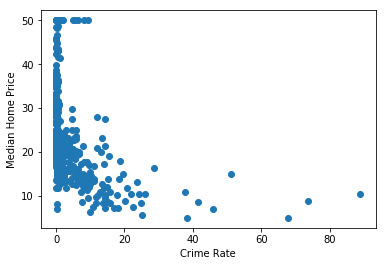

In [3]:
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice'])
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Price')
plt.show()

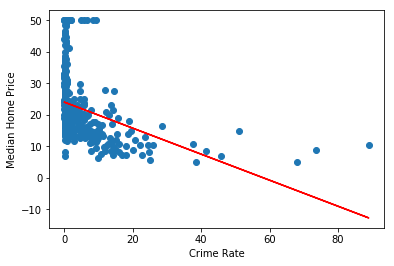

In [4]:
#use the output from the model to plot a line of best fit on the scatterplot
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice'])
plt.plot(df['CrimePerCapita'], model.predict(X), color='red')
plt.xlabel('Crime Rate')
plt.ylabel('Median Home Price')
plt.show()

>For every 100% increase in crime per capita, the expected decrease in the median home price is 412.80 dollars.


>If there was no crime, we would expect the median home price to be 24016 dollars.

>14.9% of the variability in price can be explained by the crime per capita.

>The p-value of 0.000 associated with crime per capita suggests that it is statistically significant in providing information in predicting the median home values.